In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
df = pd.read_csv(r'M:/Risk Management/DW/TUX Scorecard/TUX_Scores/Large_Payload_Segmentation_Testing_11.24_05.25/Nov2024_May2025_payload_scoring_applicant.csv', dtype={'id': str})

# r'M:/Risk Management/DW/Scorecard/TUX_Scores/Feb2025Sample-Gen12ECNLs.xlsx'

In [ ]:
# df2 = pd.read_excel(r'M:/Risk Management/DW/Scorecard/TUX_Scores/Feb2025Sample-Gen13ECNLs.xlsx')

In [6]:
df3 = pd.read_excel(r'M:/Risk Management/DW/TUX Scorecard/TUX_Scores/Large_Payload_Segmentation_Testing_11.24_05.25/AutoDeclineApps_LargePayloadSample.xlsx')

# 'M:/Risk Management/DW/Scorecard/TUX_Scores/AutoDeclineApps-FebPayloadsSample.xlsx'

In [7]:
df4 = pd.read_excel(r'M:/Risk Management/DW/TUX Scorecard/TUX_Scores/Large_Payload_Segmentation_Testing_11.24_05.25/DebtorData_LargePayloadSample.xlsx')

# 'M:/Risk Management/DW/Scorecard/TUX_Scores/DebtorData_Feb_PayloadsSample.xlsx'

In [8]:
df5 = pd.read_excel(r'M:/Risk Management/DW/TUX Scorecard/TUX_Scores/Large_Payload_Segmentation_Testing_11.24_05.25/AppLevelIncomeTUX_LargeFile_PayloadTesting.xlsx')

# 'M:/Risk Management/DW/Scorecard/TUX_Scores/AppLevelIncomeFebTUXPayloads.xlsx'

In [9]:
scorecard_map = {
    'Scorecard1': 'TUX_OpenBK',
    'Scorecard2': 'TUX_Thin',
    'Scorecard3': 'TUX_ThickDirty',
    'Scorecard4': 'TUX_ThickClean'
}

df['ScorecardName'] = df['CreditScorecardName'].map(scorecard_map)

In [10]:
# extract debtorid from id column in df
df['DebtorID'] = df['id'].astype(str).str[7:15]

In [ ]:
# extract debtorid from id column in df2
# df2['DebtorID'] = df2['id'].astype(str).str[7:15]

In [11]:
# df['DebtorID'] = df['DebtorID'].astype(int)
df['DebtorID'] = pd.to_numeric(df['DebtorID'], errors='coerce').astype('Int64')

In [ ]:
# df2['DebtorID'] = df2['DebtorID'].astype(int)

In [12]:
df4.rename(columns={'bigdebtorid': 'DebtorId', 'bigDebtorId2': 'DebtorId2'}, inplace=True)

In [13]:
df4['DebtorId'] = df4['DebtorId'].astype('Int64')
df4['DebtorId2'] = df4['DebtorId2'].astype('Int64')

In [14]:
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236077 entries, 0 to 236076
Data columns (total 46 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            236077 non-null  object 
 1   AccountId                     236077 non-null  int64  
 2   RequestId                     236077 non-null  int64  
 3   RowId                         236077 non-null  int64  
 4   RequestDate                   236077 non-null  object 
 5   EffectiveDate                 236077 non-null  object 
 6   PfsModelName                  236077 non-null  object 
 7   SourceFileName                236077 non-null  object 
 8   CreditScorecardVersion        236074 non-null  object 
 9   CreditScorecardName           236074 non-null  object 
 10  CreditLogScore                236077 non-null  float64
 11  CreditAdjustedLogScore        236077 non-null  float64
 12  CreditProbablityToDefault     236077 non-nul

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236077 entries, 0 to 236076
Data columns (total 50 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            236077 non-null  object 
 1   AccountId                     236077 non-null  int64  
 2   RequestId                     236077 non-null  int64  
 3   RowId                         236077 non-null  int64  
 4   RequestDate                   236077 non-null  object 
 5   EffectiveDate                 236077 non-null  object 
 6   PfsModelName                  236077 non-null  object 
 7   SourceFileName                236077 non-null  object 
 8   CreditScorecardVersion        236074 non-null  object 
 9   CreditScorecardName           236074 non-null  object 
 10  CreditLogScore                236077 non-null  float64
 11  CreditAdjustedLogScore        236077 non-null  float64
 12  CreditProbablityToDefault     236077 non-nul

In [17]:
# Merge df with df4 to check for a primary match
df = df.merge(df4[['DebtorId', 'DebtorId2']], how='left', left_on='DebtorID', right_on='DebtorId')

In [18]:
# Merge df again to check for a co-applicant match (ApplicantID == ApplicantId2)
df = df.merge(df4[['DebtorId', 'DebtorId2']], how='left', left_on='DebtorID', right_on='DebtorId2', suffixes=('_primary', '_coapp'))

In [20]:
# Create 'bitPrimary' column
df['bitPrimary'] = df.apply(lambda x: 
    1 if pd.notna(x['DebtorID']) and pd.notna(x['DebtorId_primary']) and x['DebtorID'] == x['DebtorId_primary']
    else (0 if pd.notna(x['DebtorID']) and pd.notna(x['DebtorId2_coapp']) and x['DebtorID'] == x['DebtorId2_coapp']
          else None), axis=1)

In [ ]:
print(df['DebtorID'].head())
print(df4['DebtorId'].head())


In [ ]:
# # Merge df2 with df4 to check for a primary match
# df2 = df2.merge(df4[['DebtorId', 'DebtorId2']], how='left', left_on='DebtorID', right_on='DebtorId')

# # Merge df2 again to check for a co-applicant match (ApplicantID == ApplicantId2)
# df2 = df2.merge(df4[['DebtorId', 'DebtorId2']], how='left', left_on='DebtorID', right_on='DebtorId2', suffixes=('_primary', '_coapp'))


In [ ]:
# # Create 'bitPrimary' column in df2
# df2['bitPrimary'] = df2.apply(lambda x: 
#     1 if pd.notna(x['DebtorID']) and pd.notna(x['DebtorId_primary']) and x['DebtorID'] == x['DebtorId_primary']
#     else (0 if pd.notna(x['DebtorID']) and pd.notna(x['DebtorId2_coapp']) and x['DebtorID'] == x['DebtorId2_coapp']
#           else None), axis=1)

In [21]:
# Drop extra columns used for merging
df.drop(columns=['DebtorId2_primary', 'DebtorId_coapp'], inplace=True)

In [ ]:
# # Drop extra columns used for merging
# df2.drop(columns=['DebtorId2_primary', 'DebtorId_coapp'], inplace=True)

In [22]:
# drop unnecessary columns
df = df.drop(['ErrorMessage', 'SourceFileName', 'id', 'RowId', 'RequestId'], axis=1)

In [23]:
# # drop unnecessary columns
# df2 = df2.drop(['ErrorMessage', 'SourceFileName', 'id', 'RowId', 'RequestId'], axis=1)

In [24]:
df3.rename(columns={'bigAccountId': 'AccountId'}, inplace=True)

In [25]:
df5.rename(columns={'ACCOUNTID': 'ACCOUNT_ID', 'DBTREMP1_GROSSMONTHLY': 'DebtorTtlIncome', 'CODBTREMP1_GROSSMONTHLY': 'CoDebtorTtlIncome'}, inplace=True)

In [26]:
# Merge df5 onto df using Accountid
df = df.merge(df5[['ACCOUNT_ID', 'DEBTOR_ID', 'DebtorTtlIncome', 'CODEBTOR_ID', 'CoDebtorTtlIncome']], 
                how='left', left_on='AccountId', right_on='ACCOUNT_ID')

# Drop AccountID column from df5 
df.drop(columns=['ACCOUNT_ID'], inplace=True)

In [27]:
# Weighting 60/40 towards credit
df['AvgEQScore60_40'] = (0.60 * df['CreditEqualizedScore']) + (0.40 * df['CapacityEqualizedScore'])

In [28]:
# Set 60/40 scoring column as int
df['AvgEQScore60_40'] = df['AvgEQScore60_40'].astype(int)

In [ ]:
# df2_sub = df2[['AccountId', 'DebtorID', 'DebtorId_primary', 'DebtorId2_coapp', 'ScoreEcnlMod', 'ScoreEcnl', 'ScoreLgd', 'ScorePd', 'ScoreAd']].copy()

In [ ]:
# df2_sub.rename(columns={'ScoreEcnlMod': 'Gen13ScoreEcnlMod', 'ScoreEcnl': 'Gen13ScoreEcnl', 'ScoreLgd': 'Gen13ScoreLgd', 'ScorePd': 'Gen13ScorePd', 'ScoreAd': 'Gen13ScoreAd'}, inplace=True)

In [ ]:
# merged_df1 = df.merge(df2_sub, left_on=['AccountId', 'DebtorId_primary', 'DebtorId2_coapp'], right_on=['AccountId', 'DebtorId_primary', 'DebtorId2_coapp'], how='left')

In [29]:
merged_df = pd.merge(df, df3, on='AccountId', how='left')

In [30]:
rows_before = merged_df.shape[0]
print(f"Rows before filtering: {rows_before}")

Rows before filtering: 236077


In [31]:
# Filter merged_df to exclude rows where All_AD_rules == 1 and ScoreEcnlMod == 1
final_df = merged_df[
    (merged_df['All_Auto_Declines'] != 1) # & (merged_df['ScoreEcnlMod'] != 1)
]

In [32]:
rows_after = final_df.shape[0]
print(f"Rows after filtering: {rows_after}")

Rows after filtering: 118535


In [33]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118535 entries, 0 to 236070
Data columns (total 56 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   AccountId                     118535 non-null  int64         
 1   RequestDate                   118535 non-null  object        
 2   EffectiveDate                 118535 non-null  object        
 3   PfsModelName                  118535 non-null  object        
 4   CreditScorecardVersion        118534 non-null  object        
 5   CreditScorecardName           118534 non-null  object        
 6   CreditLogScore                118535 non-null  float64       
 7   CreditAdjustedLogScore        118535 non-null  float64       
 8   CreditProbablityToDefault     118535 non-null  float64       
 9   CreditEqualizedScore          118535 non-null  int64         
 10  CapacityScorecardVersion      118534 non-null  object        
 11  CapacityScorecardN

In [34]:
# Pivot showing the avg TUX credit score for the bitPrimary pivot table
AvgCrScore_DebtorType = pd.pivot_table(final_df, 
                                    values='CreditEqualizedScore',
                                    index='ScorecardName',
                                    columns='bitPrimary',
                                    aggfunc='mean',
                                    fill_value=0
                                    )
AvgCrScore_DebtorType = AvgCrScore_DebtorType.astype(int)

AvgCrScore_DebtorType

bitPrimary,0.0,1.0
ScorecardName,,
TUX_OpenBK,694,673
TUX_ThickClean,726,727
TUX_ThickDirty,652,650
TUX_Thin,624,620


In [35]:
# Pivot showing the avg capacity score for the bitPrimary pivot table
AvgCapScore_DebtorType = pd.pivot_table(final_df, 
                                    values='CapacityEqualizedScore',
                                    index='ScorecardName',
                                    columns='bitPrimary',
                                    aggfunc='mean',
                                    fill_value=0
                                    )
AvgCapScore_DebtorType = AvgCapScore_DebtorType.astype(int)

AvgCapScore_DebtorType

bitPrimary,0.0,1.0
ScorecardName,,
TUX_OpenBK,690,688
TUX_ThickClean,659,679
TUX_ThickDirty,668,681
TUX_Thin,627,651


In [53]:
# Pivot showing the avg eq score for the bitPrimary pivot table
AvgEQScore_DebtorType = pd.pivot_table(final_df, 
                                    values='ApplicantScore',
                                    index='ScorecardName',
                                    columns='bitPrimary',
                                    aggfunc='mean',
                                    fill_value=0
                                    )
AvgEQScore_DebtorType = AvgEQScore_DebtorType.astype(int)

AvgEQScore_DebtorType

bitPrimary,0.0,1.0
ScorecardName,,
TUX_OpenBK,692,679
TUX_ThickClean,699,708
TUX_ThickDirty,659,663
TUX_Thin,625,632


In [37]:
# Pivot showing the avg 60/40 eq score for the bitPrimary pivot table
Avg6040EQScore_DebtorType = pd.pivot_table(final_df, 
                                    values='AvgEQScore60_40',
                                    index='ScorecardName',
                                    columns='bitPrimary',
                                    aggfunc='mean',
                                    fill_value=0
                                    )
Avg6040EQScore_DebtorType = Avg6040EQScore_DebtorType.astype(int)

Avg6040EQScore_DebtorType

bitPrimary,0.0,1.0
ScorecardName,,
TUX_OpenBK,692,679
TUX_ThickClean,699,708
TUX_ThickDirty,658,662
TUX_Thin,624,632


In [38]:
# Table count and % apps with co-debtors when they are in a different SC than applicant
account_groups = final_df.groupby('AccountId')
multi_applicant_accounts = account_groups.filter(lambda x: len(x) > 1)

# Check if Scorecard is different for applicants
multi_applicant_accounts['Scorecard_diff'] = multi_applicant_accounts.groupby('AccountId')['ScorecardName'].transform('nunique') > 1

# Count how many unique apps are in different scorecards
accounts_with_diff_segments = multi_applicant_accounts[multi_applicant_accounts['Scorecard_diff']]

# Count different scorecard combinations for those accounts
segment_counts = pd.pivot_table(accounts_with_diff_segments,
                                values='AccountId', 
                                index='ScorecardName', 
                                aggfunc='nunique')

# Calculate % of each scorecard in accounts with different segments
total_accounts_with_diff_segments = len(accounts_with_diff_segments['AccountId'].unique())
segment_counts['percentage'] = (segment_counts['AccountId'] / total_accounts_with_diff_segments) * 100

print(segment_counts)

                AccountId  percentage
ScorecardName                        
TUX_OpenBK            369    5.303248
TUX_ThickClean       3831   55.058925
TUX_ThickDirty       5177   74.403564
TUX_Thin             4539   65.234263


In [39]:
# Check the distribution of 'bitPrimary' across full data set
print(final_df['bitPrimary'].value_counts())

bitPrimary
1.0    103381
0.0     15154
Name: count, dtype: int64


In [40]:
# ID multi-applicant accounts
coapp_accounts = final_df.groupby('AccountId').filter(lambda x: len(x) > 1)

# Check the number of multi-applicant accounts
print(f"Total multi-applicant accounts: {len(coapp_accounts['AccountId'].unique())}")

# If 'bitPrimary' is a string, convert it to integer
coapp_accounts['bitPrimary'] = coapp_accounts['bitPrimary'].astype(int)

# Separate primary applicants (bitPrimary == 1) and coapplicants (bitPrimary == 0)
primary_applicants = coapp_accounts[coapp_accounts['bitPrimary'] == 1]
coapplicants = coapp_accounts[coapp_accounts['bitPrimary'] == 0]

# Check the counts
print(f"Primary applicants count: {len(primary_applicants)}")
print(f"Coapplicants count: {len(coapplicants)}")

Total multi-applicant accounts: 15154
Primary applicants count: 15154
Coapplicants count: 15154


In [41]:
# Show generic distribution % of co-applicants across scorecards

# Merge primary applicants with coapplicants based on AccountId
df_comb_applcnts = primary_applicants[['AccountId', 'ScorecardName']].merge(
    coapplicants[['AccountId', 'ScorecardName']], 
    on='AccountId', 
    suffixes=('_primary', '_coapplicant')
)

# Assign these columns back to merged_df
final_df = final_df.merge(
    df_comb_applcnts[['AccountId', 'ScorecardName_primary', 'ScorecardName_coapplicant']], 
    on='AccountId', 
    how='left'
)


# Filter for cases where the applicants are in different scorecard segments
df_comb_applcnts['different_scorecard'] = df_comb_applcnts['ScorecardName_primary'] != df_comb_applcnts['ScorecardName_coapplicant']

# Filter for cases where the applicants are in different scorecards
different_scorecard_df = df_comb_applcnts[df_comb_applcnts['different_scorecard']]

# Calculate the distribution of coapplicants scorecards
coapplicant_scorecard_distribution = different_scorecard_df['ScorecardName_coapplicant'].value_counts(normalize=True) * 100

# Display the distribution as a percentage
print("Coapplicant Scorecard % Distribution:")
print(coapplicant_scorecard_distribution)


Coapplicant Scorecard % Distribution:
ScorecardName_coapplicant
TUX_ThickDirty    42.699051
TUX_Thin          34.233975
TUX_ThickClean    21.054901
TUX_OpenBK         2.012072
Name: proportion, dtype: float64


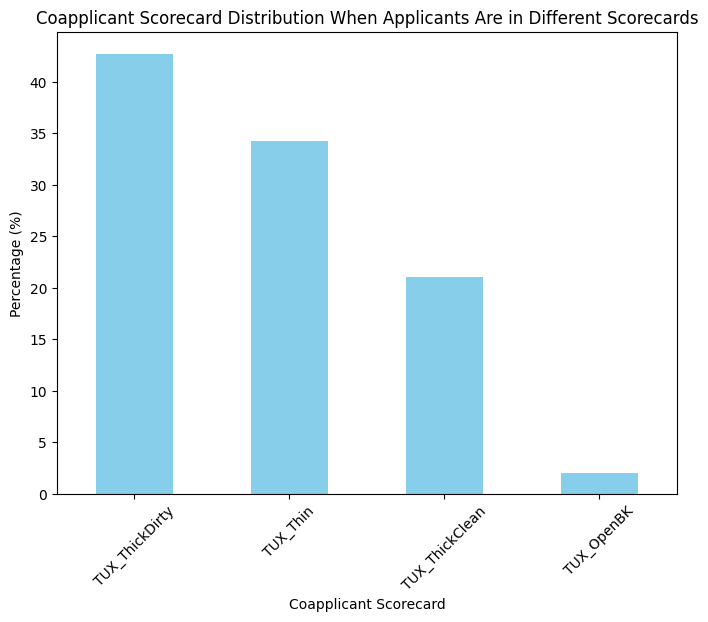

In [42]:
# Distribution plot of above calc
plt.figure(figsize=(8, 6))
coapplicant_scorecard_distribution.plot(kind='bar', color='skyblue')
plt.title('Coapplicant Scorecard Distribution When Applicants Are in Different Scorecards')
plt.xlabel('Coapplicant Scorecard')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.show()

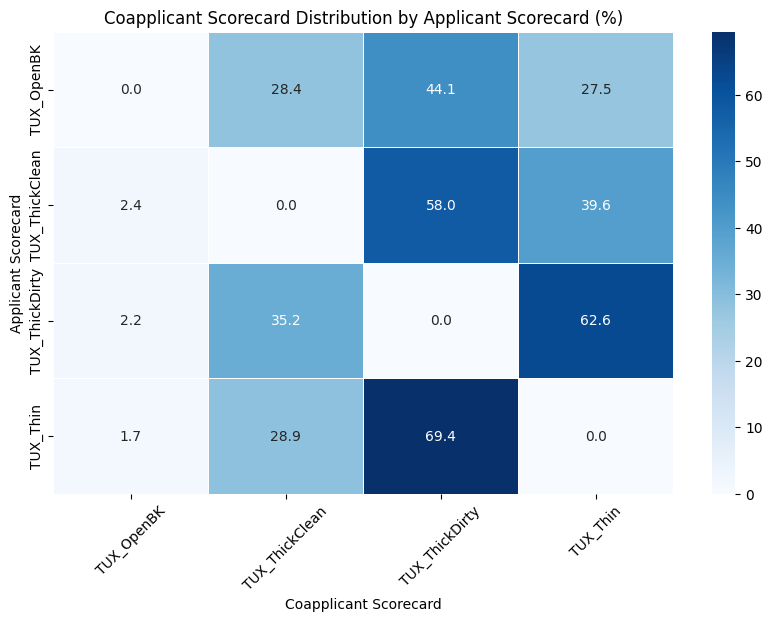

In [43]:
# Create crosstab of Applicant Scorecard vs. Coapplicant Scorecard
scorecard_crosstab = pd.crosstab(
    different_scorecard_df['ScorecardName_primary'],  # Rows: Applicant Scorecard
    different_scorecard_df['ScorecardName_coapplicant'],  # Columns: Coapplicant Scorecard
    margins=True  # Adds a total row/column
)

# Normalize by row to show percentages instead of counts
scorecard_percentage_crosstab = pd.crosstab(
    different_scorecard_df['ScorecardName_primary'],  
    different_scorecard_df['ScorecardName_coapplicant'],  
    normalize='index' 
) * 100  


# Graph
plt.figure(figsize=(10, 6))
sns.heatmap(scorecard_percentage_crosstab, annot=True, fmt=".1f", cmap="Blues", linewidths=0.5)

plt.title("Coapplicant Scorecard Distribution by Applicant Scorecard (%)")
plt.xlabel("Coapplicant Scorecard")
plt.ylabel("Applicant Scorecard")
plt.xticks(rotation=45)
plt.show()


In [44]:
# Create a flag for when applicants and coapplicants have the same scorecard
df_comb_applcnts['same_scorecard'] = df_comb_applcnts['ScorecardName_primary'] == df_comb_applcnts['ScorecardName_coapplicant']

# Filter for cases where both applicants are on the same scorecard
same_scorecard_df = df_comb_applcnts[df_comb_applcnts['same_scorecard']]

# Calculate the percentage of applications where coapplicants are on the same scorecard
same_scorecard_percentage = (len(same_scorecard_df) / len(df_comb_applcnts)) * 100

# Print the result
print(f"% of multi-debtor apps where both applicants are on the same scorecard: {same_scorecard_percentage:.2f}%")


% of multi-debtor apps where both applicants are on the same scorecard: 54.08%


Coapplicant Scorecard Distribution (Same Scorecard as Applicant):
ScorecardName_coapplicant
TUX_ThickDirty    39.714495
TUX_Thin          30.417277
TUX_OpenBK        16.251830
TUX_ThickClean    13.616398
Name: proportion, dtype: float64


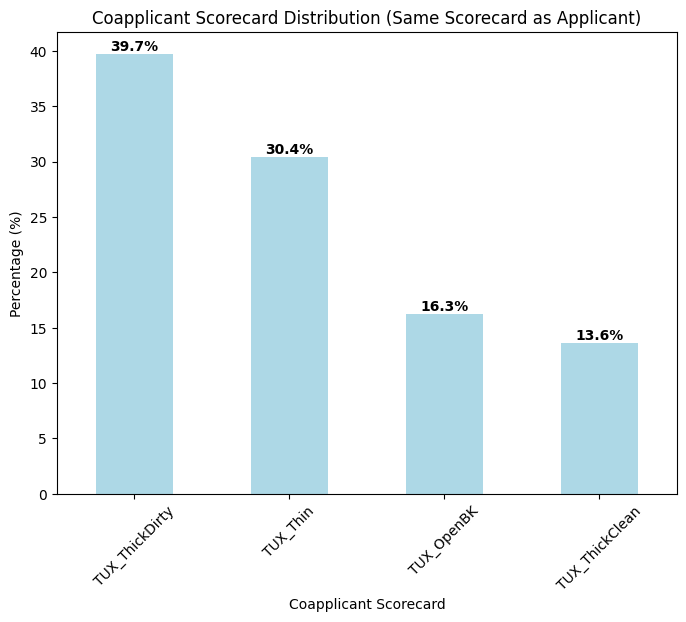

In [45]:
# Prepare data for plotting
scorecard_counts = same_scorecard_df['ScorecardName_coapplicant'].value_counts(normalize=True) * 100

# Print the summary separately
print("Coapplicant Scorecard Distribution (Same Scorecard as Applicant):")
print(scorecard_counts)

# Plot bar chart
plt.figure(figsize=(8, 6))
ax = scorecard_counts.plot(kind='bar', color='lightblue')

# Add data labels to bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',  # Format label as percentage
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position
                ha='center', va='bottom', fontsize=10, fontweight='bold')  # Styling

# Chart labels and title
plt.title('Coapplicant Scorecard Distribution (Same Scorecard as Applicant)')
plt.xlabel('Coapplicant Scorecard')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
# plt.ylim(0, 100)  # Set y-axis limits to 100% for better readability

# Show plot
plt.show()



In [46]:
print("Coapplicant Scorecard Distribution (Same Scorecard as Applicant):")
print(scorecard_counts)

Coapplicant Scorecard Distribution (Same Scorecard as Applicant):
ScorecardName_coapplicant
TUX_ThickDirty    39.714495
TUX_Thin          30.417277
TUX_OpenBK        16.251830
TUX_ThickClean    13.616398
Name: proportion, dtype: float64


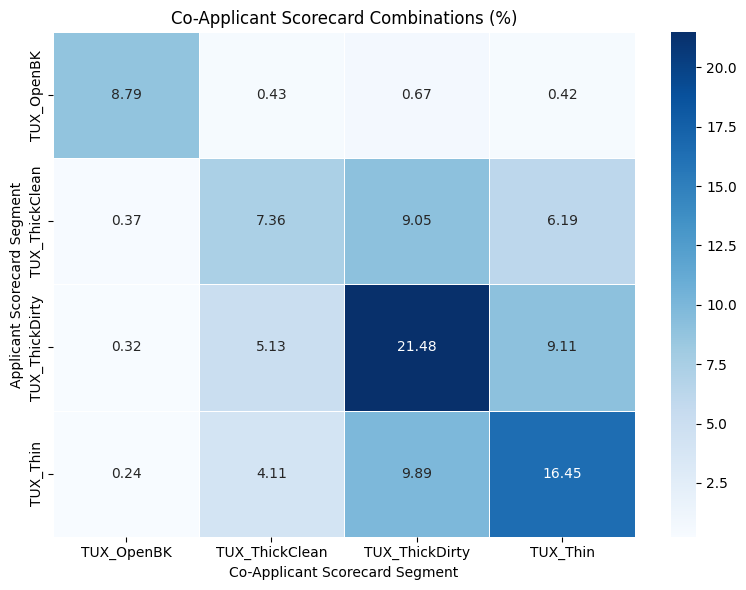

In [47]:
# Function to create a crosstab heatmap for multiple debtors across scorecard segments
def coapps_scorecard_ct(final_df):
    # Generate the crosstab for primary scorecard vs coapplicant scorecard
    crosstab = pd.crosstab(
        final_df['ScorecardName_primary'], 
        final_df['ScorecardName_coapplicant']
    )
    
    # Convert crosstab counts to percentages of the total
    crosstab_percent = crosstab / crosstab.sum().sum() * 100
    
    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(crosstab_percent, annot=True, fmt='.2f', cmap="Blues", linewidths=0.5)
    
    # Titles and labels
    plt.title("Co-Applicant Scorecard Combinations (%)")
    plt.xlabel("Co-Applicant Scorecard Segment")
    plt.ylabel("Applicant Scorecard Segment")
    plt.tight_layout()
    
    # Show plot
    plt.show()

# Call the function on your merged_df
coapps_scorecard_ct(final_df)

In [48]:
# Quantile histogram function with equalized 20/20/20/20/20 distribution

def plot_segmented_distributions(df, score_col, segment_col, output_dir):
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)
    
    # Dictionary to store quantiles for each segment
    quantiles = {}
    for segment in df[segment_col].unique():
        quantiles[segment] = df[df[segment_col] == segment][score_col].quantile([0.2, 0.4, 0.6, 0.8])

    # Create a new column to store the quantile categories
    df['EQScore_Quantile'] = df.groupby(segment_col)[score_col].transform(
        lambda x: pd.qcut(x, q=5, labels=["Q1 (0-20%)", "Q2 (20-40%)", "Q3 (40-60%)", "Q4 (60-80%)", "Q5 (80-100%)"], duplicates='drop'))

    unique_segments = df[segment_col].unique()

    for segment in unique_segments:
        # Get the quantile values for this segment
        quantile_values = quantiles[segment]
        
        # Create the plot
        plt.figure(figsize=(10, 5))
        sns.histplot(df[df[segment_col] == segment][score_col], bins=20, kde=True, color='royalblue')
        
        # Plot vertical dashed lines for quantiles
        plt.axvline(quantile_values[0.2], color='orange', linestyle='dashed', linewidth=2, label=f'Q1 (0-20%): {int(quantile_values[0.2])}')
        plt.axvline(quantile_values[0.4], color='yellow', linestyle='dashed', linewidth=2, label=f'Q2 (20-40%): {int(quantile_values[0.4])}')
        plt.axvline(quantile_values[0.6], color='green', linestyle='dashed', linewidth=2, label=f'Q3 (40-60%): {int(quantile_values[0.6])}')
        plt.axvline(quantile_values[0.8], color='blue', linestyle='dashed', linewidth=2, label=f'Q4 (60-80%): {int(quantile_values[0.8])}')
        
        # Plot the mean
        mean = df[df[segment_col] == segment][score_col].mean()
        plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean (μ): {int(mean)}')
        
        # Title and labels
        plt.title(f'Distribution of {score_col} for {segment}')
        plt.xlabel(score_col)
        plt.ylabel('Count')

        # Add legend
        plt.legend(loc='upper right')
        
        # Save the plot to a file
        file_path = os.path.join(output_dir, f'{segment}_{score_col}_distribution.png')
        plt.savefig(file_path)  # Save the plot as a PNG image

        plt.show()
        plt.close()

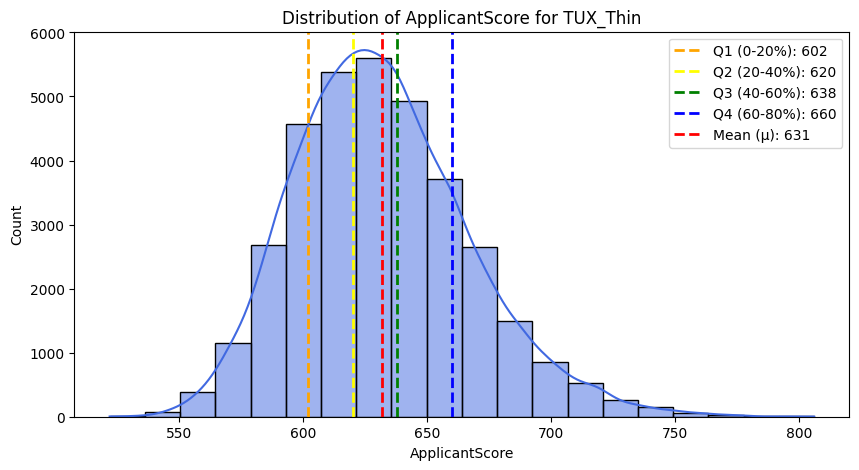

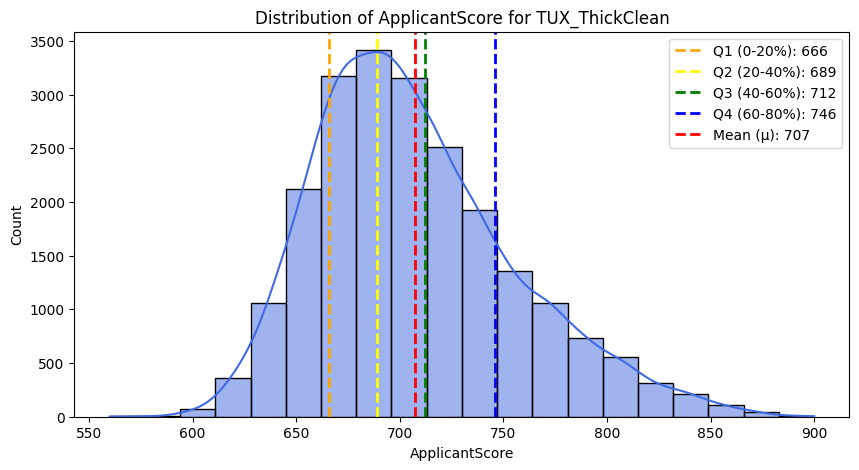

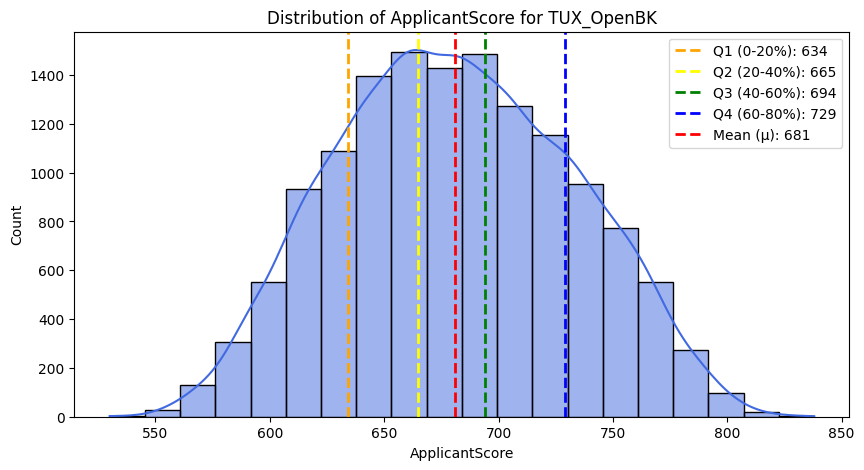

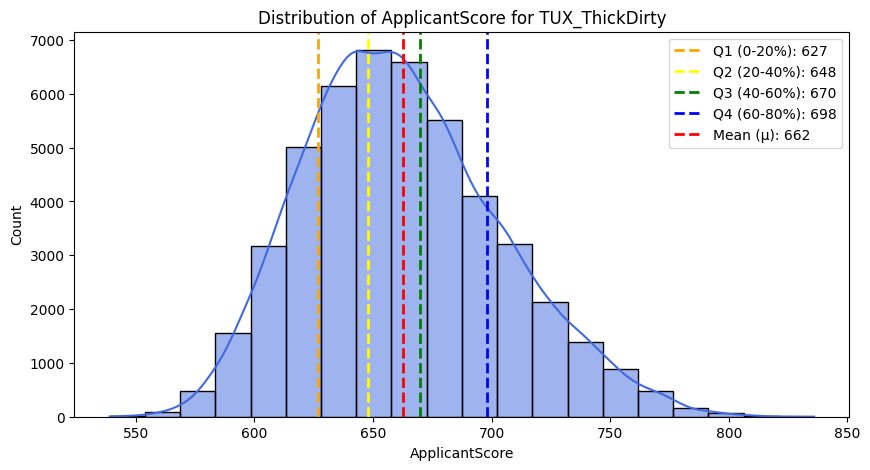

ValueError: cannot convert float NaN to integer

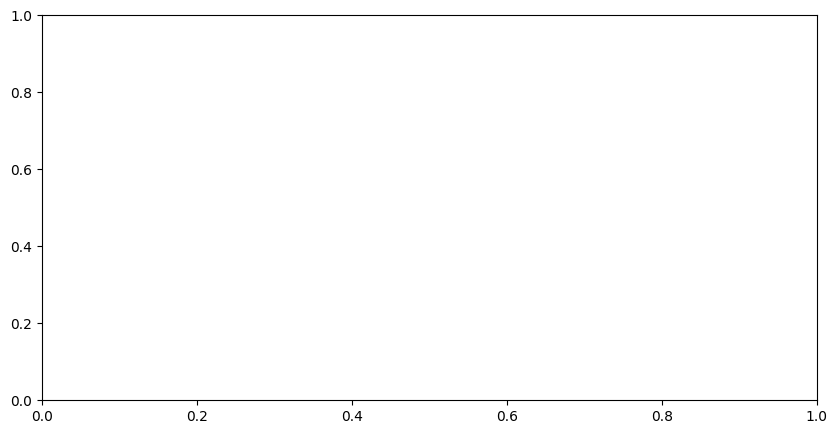

In [54]:
# showing initial distributions of equalized score averaged 50/50 credit/capacity

output_dir = r'M:/Risk Management/DW/TUX Scorecard/TUX_Scores/Images/AVG_Equalized_Score_Graphs/Large_Payload_Pop/'

plot_segmented_distributions(final_df, 'ApplicantScore', 'ScorecardName', output_dir)

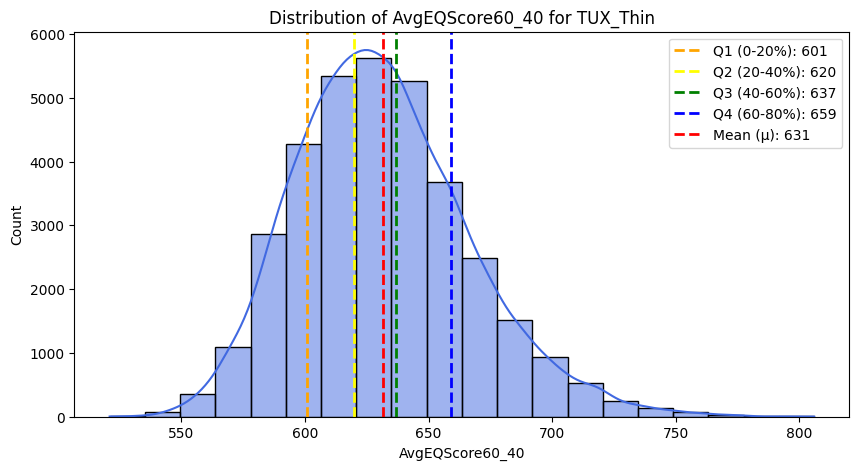

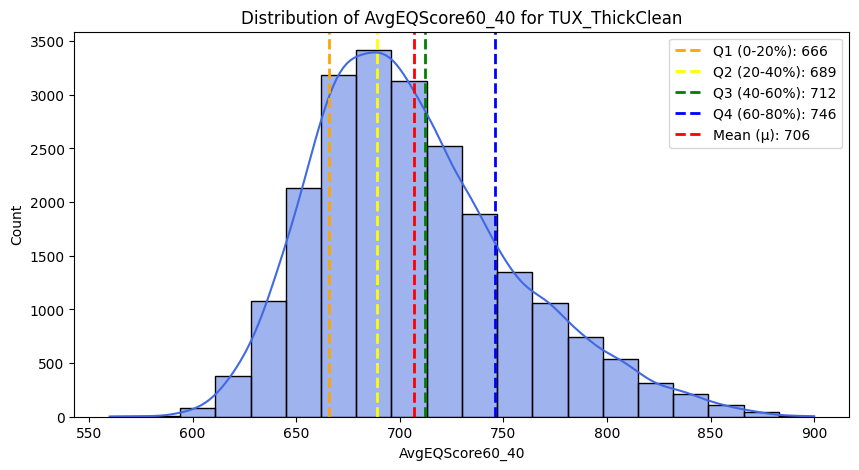

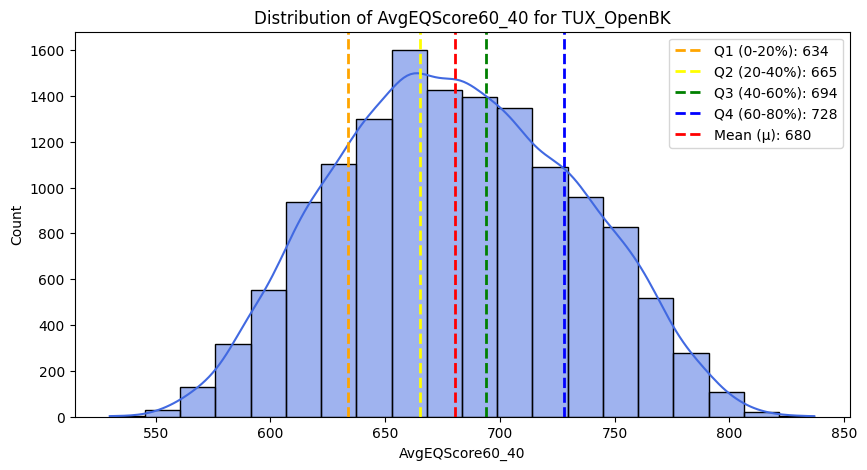

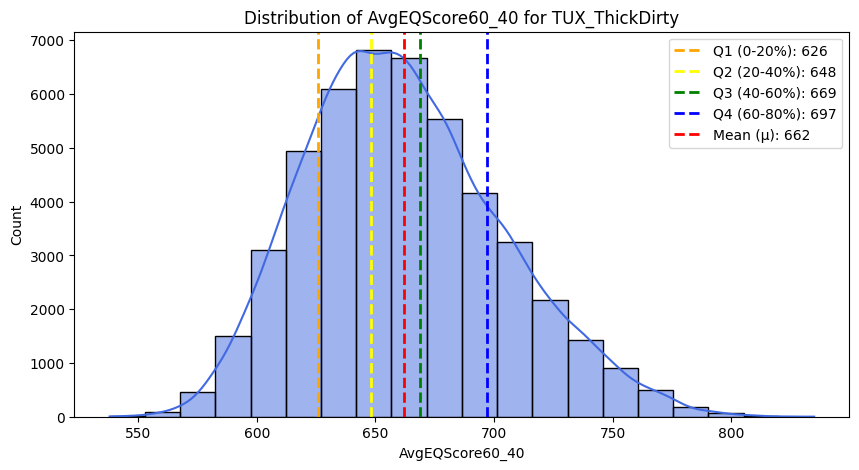

ValueError: cannot convert float NaN to integer

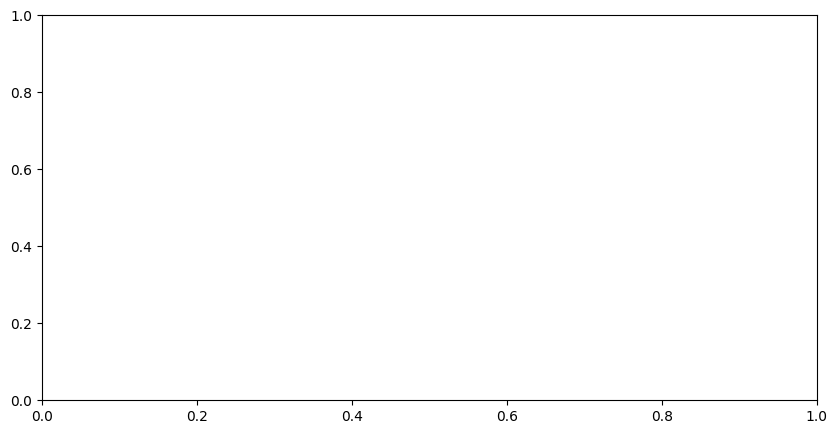

In [50]:
# showing initial distributions of equalized score averaged 50/50 credit/capacity

output_dir = r'M:/Risk Management/DW/TUX Scorecard/TUX_Scores/Images/AVG_Equalized_Score_Graphs/Large_Payload_Pop/'

plot_segmented_distributions(final_df, 'AvgEQScore60_40', 'ScorecardName', output_dir)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236077 entries, 0 to 236076
Data columns (total 49 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   AccountId                     236077 non-null  int64  
 1   RequestDate                   236077 non-null  object 
 2   EffectiveDate                 236077 non-null  object 
 3   PfsModelName                  236077 non-null  object 
 4   CreditScorecardVersion        236074 non-null  object 
 5   CreditScorecardName           236074 non-null  object 
 6   CreditLogScore                236077 non-null  float64
 7   CreditAdjustedLogScore        236077 non-null  float64
 8   CreditProbablityToDefault     236077 non-null  float64
 9   CreditEqualizedScore          236077 non-null  int64  
 10  CapacityScorecardVersion      236074 non-null  object 
 11  CapacityScorecardName         236074 non-null  object 
 12  CapacityLogScore              236077 non-nul

In [59]:
def calculate_quantile_summary(df, score_col, segment_col):
    # First, create the quantiles for each segment (scorecard name)
    df['EQScore_Quantile'] = df.groupby(segment_col)[score_col].transform(
        lambda x: pd.qcut(x, q=5, labels=["Q1 (0-20%)", "Q2 (20-40%)", "Q3 (40-60%)", "Q4 (60-80%)", "Q5 (80-100%)"], duplicates='drop'))
    
    # Prepare a list to store the summary data
    summary_data = []
    
    # Loop through each segment (scorecard)
    for segment in df[segment_col].unique():
        segment_data = df[df[segment_col] == segment]
        
        # Calculate count and average for each quantile range
        for quantile in ["Q1 (0-20%)", "Q2 (20-40%)", "Q3 (40-60%)", "Q4 (60-80%)", "Q5 (80-100%)"]:
            quantile_data = segment_data[segment_data['EQScore_Quantile'] == quantile]
            
            count = quantile_data.shape[0]  # Number of rows in the quantile
            # avg_score_mod = quantile_data['ScoreEcnlMod'].mean().round(3)
            avg_score_mod = round(quantile_data['ScoreEcnlMod'].mean(), 3) # Average of score__mod for the quantile range
            #    ScoreEcnlMod
            # Add the results to the summary data
            summary_data.append([segment, quantile, count, avg_score_mod])
    
    # Convert the summary data to a DataFrame
    summary_df = pd.DataFrame(summary_data, columns=[segment_col, 'Quantile', 'Count', 'ScoreEcnlMod'])
    
    # Pivot the table to show each segment in rows and quantiles in columns
    pivot_table = summary_df.pivot_table(index=segment_col, columns='Quantile', values=['Count', 'ScoreEcnlMod'], aggfunc='first')
    
    return pivot_table


In [60]:
 # Gen13ScoreEcnlMod   ScoreEcnlMod

In [61]:
# Now call the function to generate the summary table for the quantile distributions
pivot_table = calculate_quantile_summary(final_df, 'AvgEQScore60_40', 'ScorecardName')

# Display the result
print(pivot_table)

                    Count                                                   \
Quantile       Q1 (0-20%) Q2 (20-40%) Q3 (40-60%) Q4 (60-80%) Q5 (80-100%)   
ScorecardName                                                                
TUX_OpenBK           2830        2846        2749        2743         2769   
TUX_ThickClean       4543        4505        4372        4414         4368   
TUX_ThickDirty       9666        9731        9436        9528         9493   
TUX_Thin             6963        7043        6829        6827         6879   

               ScoreEcnlMod                                                   
Quantile         Q1 (0-20%) Q2 (20-40%) Q3 (40-60%) Q4 (60-80%) Q5 (80-100%)  
ScorecardName                                                                 
TUX_OpenBK            0.388       0.298       0.242       0.195        0.145  
TUX_ThickClean        0.435       0.362       0.315       0.260        0.176  
TUX_ThickDirty        0.509       0.445       0.404       

In [62]:
def calculate_quantile_summary(df, score_col, segment_col):
    # Create quantiles for each segment (scorecard name)
    df['EQScore_Quantile'] = df.groupby(segment_col)[score_col].transform(
        lambda x: pd.qcut(x, q=5, labels=["Q1 (0-20%)", "Q2 (20-40%)", "Q3 (40-60%)", "Q4 (60-80%)", "Q5 (80-100%)"], duplicates='drop')
    )
    
    # Prepare a list to store the summary data
    summary_data = []
    
    for segment in df[segment_col].unique():
        segment_data = df[df[segment_col] == segment]
        
        for quantile in ["Q1 (0-20%)", "Q2 (20-40%)", "Q3 (40-60%)", "Q4 (60-80%)", "Q5 (80-100%)"]:
            quantile_data = segment_data[segment_data['EQScore_Quantile'] == quantile]
            
            count = quantile_data.shape[0]  # Number of rows in the quantile
            # avg_score_mod = quantile_data['Gen13ScoreEcnlMod'].mean().round(4)  # Average of score__mod for the quantile range
            avg_score_mod = round(quantile_data['ScoreEcnlMod'].mean(), 4)
            # Add the results to the summary data
            summary_data.append([segment, quantile, count, avg_score_mod])
    
    # Convert the summary data to a DataFrame
    summary_df = pd.DataFrame(summary_data, columns=[segment_col, 'Quantile', 'Count', 'ScoreEcnlMod'])
    
    # Pivot to show each segment in rows and quantiles in columns
    count_table = summary_df.pivot_table(index=segment_col, columns='Quantile', values='Count', aggfunc='first')
    avg_score_table = summary_df.pivot_table(index=segment_col, columns='Quantile', values='ScoreEcnlMod', aggfunc='first')

    return count_table, avg_score_table


In [63]:
# Function to display the tables with simple formatting
def display_tables(count_table, avg_score_table):
    # Print the count table and average score table
    print("Count Table (Applications per Quantile):")
    print(count_table.to_string())  # Use .to_string() for better formatting in console
    
    print("\nAverage Score Table (Avg Score per Quantile):")
    print(avg_score_table.to_string())  # Print the average score table
    
# Call the function on your final DataFrame
count_table, avg_score_table = calculate_quantile_summary(final_df, 'AvgEQScore60_40', 'ScorecardName')

# Display the tables
display_tables(count_table, avg_score_table)


Count Table (Applications per Quantile):
Quantile        Q1 (0-20%)  Q2 (20-40%)  Q3 (40-60%)  Q4 (60-80%)  Q5 (80-100%)
ScorecardName                                                                  
TUX_OpenBK            2830         2846         2749         2743          2769
TUX_ThickClean        4543         4505         4372         4414          4368
TUX_ThickDirty        9666         9731         9436         9528          9493
TUX_Thin              6963         7043         6829         6827          6879

Average Score Table (Avg Score per Quantile):
Quantile        Q1 (0-20%)  Q2 (20-40%)  Q3 (40-60%)  Q4 (60-80%)  Q5 (80-100%)
ScorecardName                                                                  
TUX_OpenBK          0.3875       0.2985       0.2423       0.1954        0.1445
TUX_ThickClean      0.4347       0.3623       0.3147       0.2600        0.1765
TUX_ThickDirty      0.5092       0.4448       0.4039       0.3523        0.2698
TUX_Thin            0.5143      

In [64]:
# Add score ranges based on quantiles
def add_quantile_ranges(df, score_col, segment_col):
    # Create quantile ranges
    ranges = {}
    for segment in df[segment_col].unique():
        segment_data = df[df[segment_col] == segment]
        
        quantiles = segment_data[score_col].quantile([0.2, 0.4, 0.6, 0.8, 1.0]).values
        ranges[segment] = {
            "Q1 (0-20%)": (0, quantiles[0]),
            "Q2 (20-40%)": (quantiles[0], quantiles[1]),
            "Q3 (40-60%)": (quantiles[1], quantiles[2]),
            "Q4 (60-80%)": (quantiles[2], quantiles[3]),
            "Q5 (80-100%)": (quantiles[3], quantiles[4])
        }
    return ranges

# Call the function to add ranges
ranges = add_quantile_ranges(final_df, 'AvgEQScore60_40', 'ScorecardName')

# Now, print the ranges for each quantile
for segment, quantile_ranges in ranges.items():
    print(f"\nQuantile Ranges for {segment}:")
    for quantile, (low, high) in quantile_ranges.items():
        print(f"{quantile}: {low:.0f} - {high:.0f}")



Quantile Ranges for TUX_Thin:
Q1 (0-20%): 0 - 601
Q2 (20-40%): 601 - 620
Q3 (40-60%): 620 - 637
Q4 (60-80%): 637 - 659
Q5 (80-100%): 659 - 806

Quantile Ranges for TUX_ThickClean:
Q1 (0-20%): 0 - 666
Q2 (20-40%): 666 - 689
Q3 (40-60%): 689 - 712
Q4 (60-80%): 712 - 746
Q5 (80-100%): 746 - 900

Quantile Ranges for TUX_OpenBK:
Q1 (0-20%): 0 - 634
Q2 (20-40%): 634 - 665
Q3 (40-60%): 665 - 694
Q4 (60-80%): 694 - 728
Q5 (80-100%): 728 - 837

Quantile Ranges for TUX_ThickDirty:
Q1 (0-20%): 0 - 626
Q2 (20-40%): 626 - 648
Q3 (40-60%): 648 - 669
Q4 (60-80%): 669 - 697
Q5 (80-100%): 697 - 835

Quantile Ranges for nan:
Q1 (0-20%): 0 - nan
Q2 (20-40%): nan - nan
Q3 (40-60%): nan - nan
Q4 (60-80%): nan - nan
Q5 (80-100%): nan - nan


In [68]:
# standard deviation histogram function

def plot_std_histograms(df, score_col, segment_col, output_dir):
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)
    
    unique_segments = df[segment_col].unique()
    
    for segment in unique_segments:
        subset = df[df[segment_col] == segment]
        mean = subset[score_col].mean()
        std = subset[score_col].std()
        
        # Calculate standard deviation boundaries and convert to integer
        if pd.notna(mean) and pd.notna(std):
            minus_1_std = int(mean - std)
            plus_1_std = int(mean + std)
            minus_2_std = int(mean - 2 * std)
            plus_2_std = int(mean + 2 * std)
            # Continue plotting
        else:
            print(f"Skipping {segment} due to NaN mean or std.")
            continue
    
        # minus_1_std = int(mean - std)
        # plus_1_std = int(mean + std)
        # minus_2_std = int(mean - 2 * std)
        # plus_2_std = int(mean + 2 * std)
        
        # Define the number of bins manually to control x-axis
        bin_width = (subset[score_col].max() - subset[score_col].min()) / 20
        bins = int((subset[score_col].max() - subset[score_col].min()) / bin_width)

        # Create a new figure
        plt.figure(figsize=(8, 5))
        
        # Plot the histogram with KDE
        sns.histplot(subset[score_col], bins=bins, kde=True, color='royalblue', alpha=0.6)
        
        # Plot mean and standard deviation lines
        line_1 = plt.axvline(mean, color='red', linestyle='dashed', linewidth=2)
        line_minus_1_std = plt.axvline(minus_1_std, color='orange', linestyle='dashed', linewidth=2)
        line_plus_1_std = plt.axvline(plus_1_std, color='orange', linestyle='dashed', linewidth=2)
        line_minus_2_std = plt.axvline(minus_2_std, color='green', linestyle='dashed', linewidth=2)
        line_plus_2_std = plt.axvline(plus_2_std, color='green', linestyle='dashed', linewidth=2)

        # Add the lines and their corresponding values in the legend
        plt.legend(
            handles=[line_1, line_plus_1_std, line_minus_1_std, line_plus_2_std, line_minus_2_std],
            labels=[f'Mean (μ): {int(mean)}', f'+1σ: {plus_1_std}', f'-1σ: {minus_1_std}', f'+2σ: {plus_2_std}', f'-2σ: {minus_2_std}'],
            loc='upper right'
        )
        
        # Title and labels
        plt.title(f'Score Distribution for {segment}')
        plt.xlabel(score_col)
        plt.ylabel('Count')

        # Save the plot to a file
        file_path = os.path.join(output_dir, f'{segment}_{score_col}_std_distribution.png')
        plt.savefig(file_path) 

        plt.show()
        plt.close()

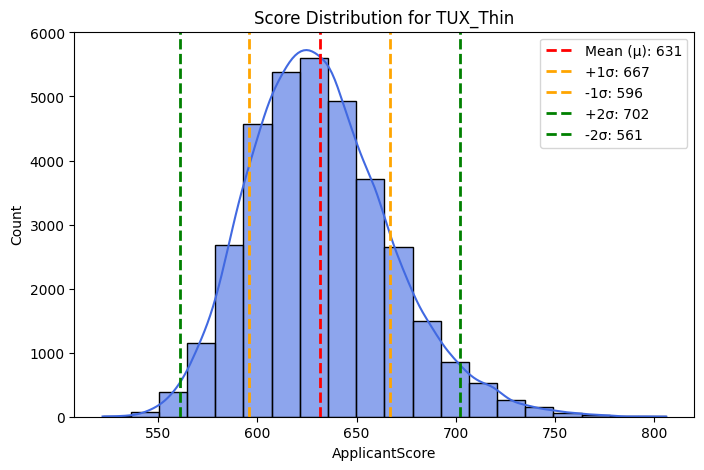

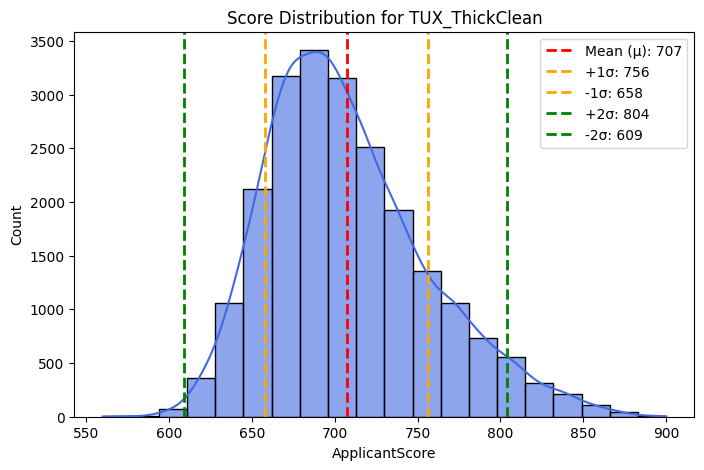

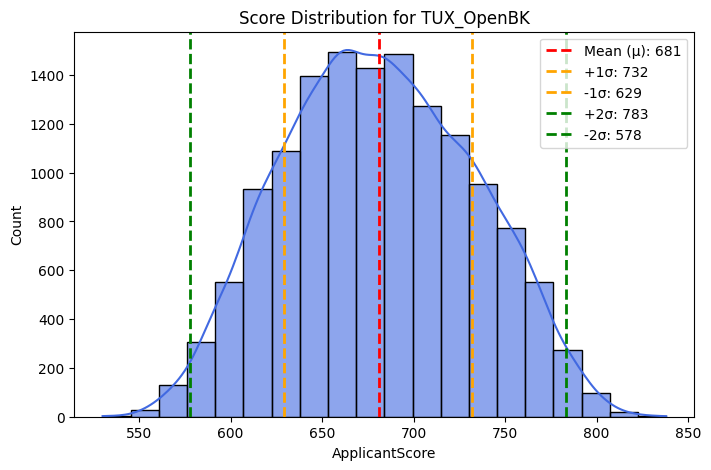

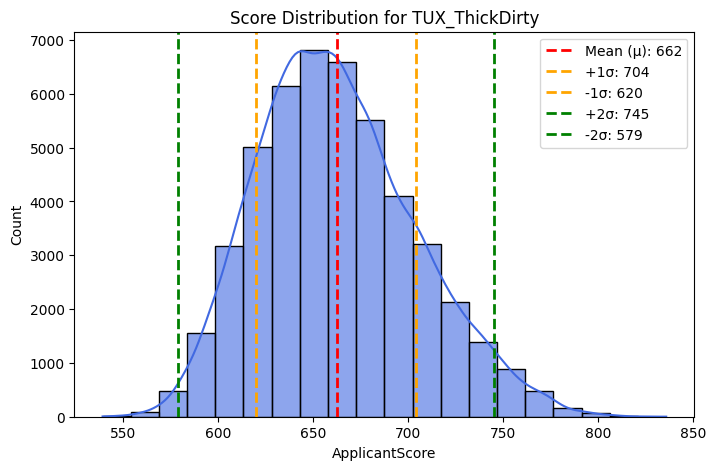

Skipping nan due to NaN mean or std.


In [69]:
# st. dev histograms on averaged eq score
output_dir = r'M:/Risk Management/DW/TUX Scorecard/TUX_Scores/Images/AVG_Equalized_Score_Graphs/Large_Payload_Pop/'

plot_std_histograms(final_df, 'ApplicantScore', 'ScorecardName', output_dir)

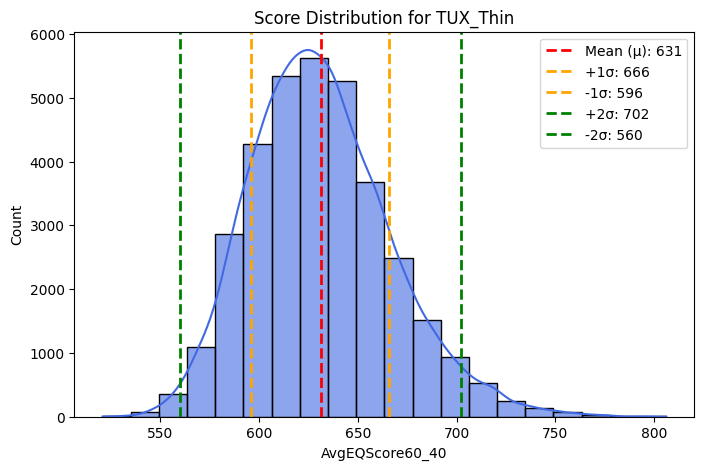

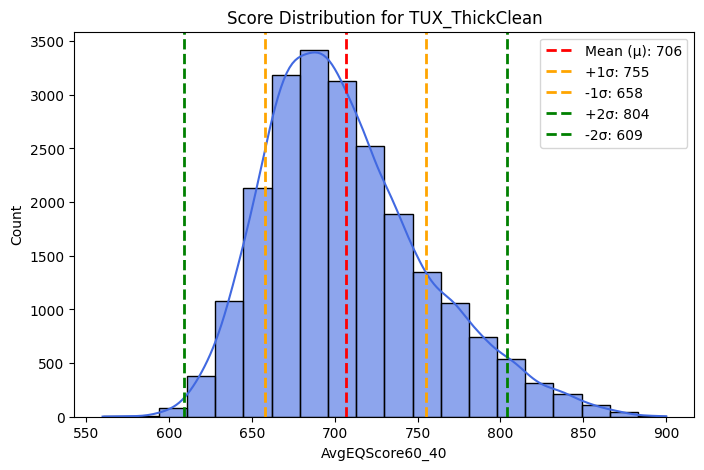

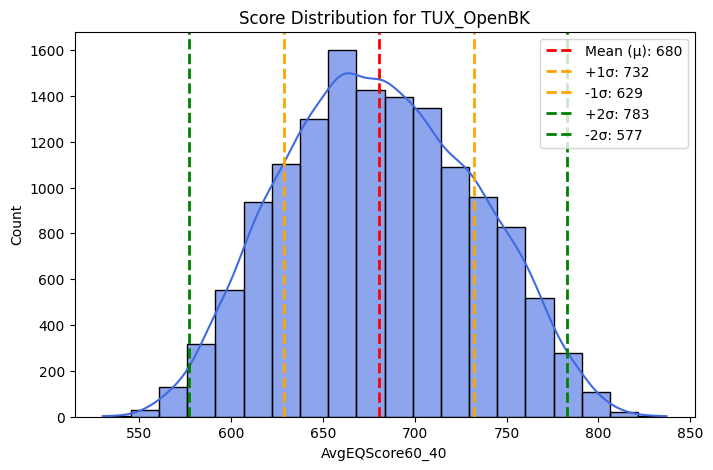

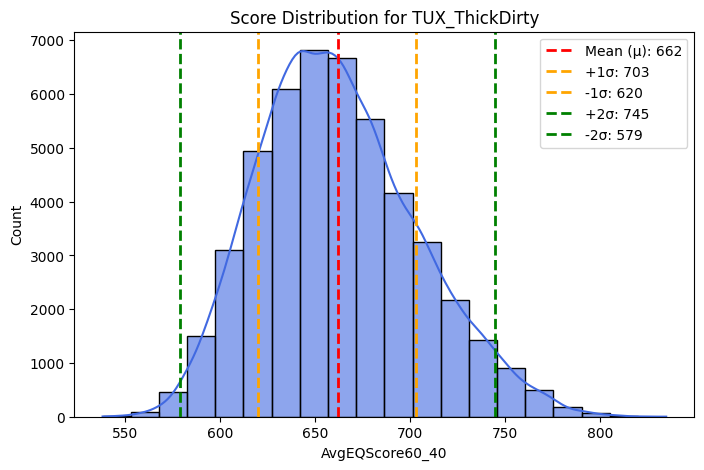

Skipping nan due to NaN mean or std.


In [71]:
# st. dev histograms on averaged eq score
output_dir = r'M:/Risk Management/DW/TUX Scorecard/TUX_Scores/Images/AVG_Equalized_Score_Graphs/Large_Payload_Pop/'

plot_std_histograms(final_df, 'AvgEQScore60_40', 'ScorecardName', output_dir)

In [77]:
# Decile distribution plots

def plot_segmented_distributions10(df, score_col, segment_col, output_dir):
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)
    
    # Dictionary to store quantiles for each segment
    quantiles = {}
    for segment in df[segment_col].unique():
        quantiles[segment] = df[df[segment_col] == segment][score_col].quantile(
            [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

    # Create a new column to store the quantile categories
    df['EQScore_Quantile10'] = df.groupby(segment_col)[score_col].transform(
        lambda x: pd.qcut(
            x,
            q=10,
            labels=[
                "Q1 (0-10%)", "Q2 (10-20%)", "Q3 (20-30%)", "Q4 (30-40%)", "Q5 (40-50%)", "Q6 (50-60%)", "Q7 (60-70%)", 
                "Q8 (70-80%)", "Q9 (80-90%)", "Q10 (90-100%)"], duplicates='drop'))

    # Get all unique segment values
    unique_segments = df[segment_col].unique()

    for segment in unique_segments:
        # Filter data for the current segment
        segment_data = df[df[segment_col] == segment]
        
        # Get the quantile values
        quantile_values = quantiles[segment]
        
        # Create the plot
        plt.figure(figsize=(12, 6))
        sns.histplot(segment_data[score_col], bins=20, kde=True, color='royalblue')

        # Plot vertical dashed lines for each quantile (10% to 90%)
        colors = sns.color_palette("husl", 9)
        # for idx, q in enumerate(quantile_values.index):
        #     plt.axvline(
        #         quantile_values[q],
        #         color=colors[idx % len(colors)],
        #         linestyle='dashed',
        #         linewidth=1.5,
        #         label=f'{int(q*100)}%: {int(quantile_values[q])}'
        #         )
        for idx, q in enumerate(quantile_values.index):
            value = quantile_values[q]
            if pd.notna(value):
                label = f'{int(q*100)}%: {int(value)}'
            else:
                label = f'{int(q*100)}%: n/a'
                value = segment_data[score_col].mean()  # fallback line

            plt.axvline(
                value,
                color=colors[idx % len(colors)],
                linestyle='dashed',
                linewidth=1.5,
                label=label
            )


        # Plot the mean line
        mean = segment_data[score_col].mean()
        # Add a dummy invisible line just for legend
        plt.plot([], [], color='red', linestyle='dashed', linewidth=2, label=f'Mean (μ): {int(mean)}')

        
        # Add title and axis labels
        plt.title(f'Distribution of {score_col} for {segment}')
        plt.xlabel(score_col)
        plt.ylabel('Count')

        # Add legend
        plt.legend(loc='upper right', fontsize='small')
        
        # Save the plot to a file
        file_path = os.path.join(output_dir, f'{segment}_{score_col}_distribution10s.png')
        plt.savefig(file_path)
        plt.show()
        plt.close()


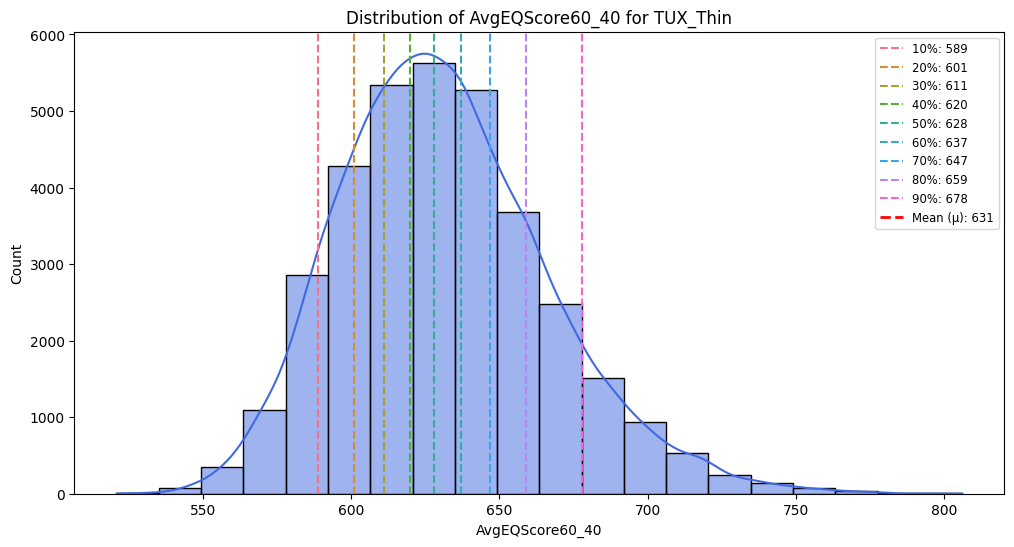

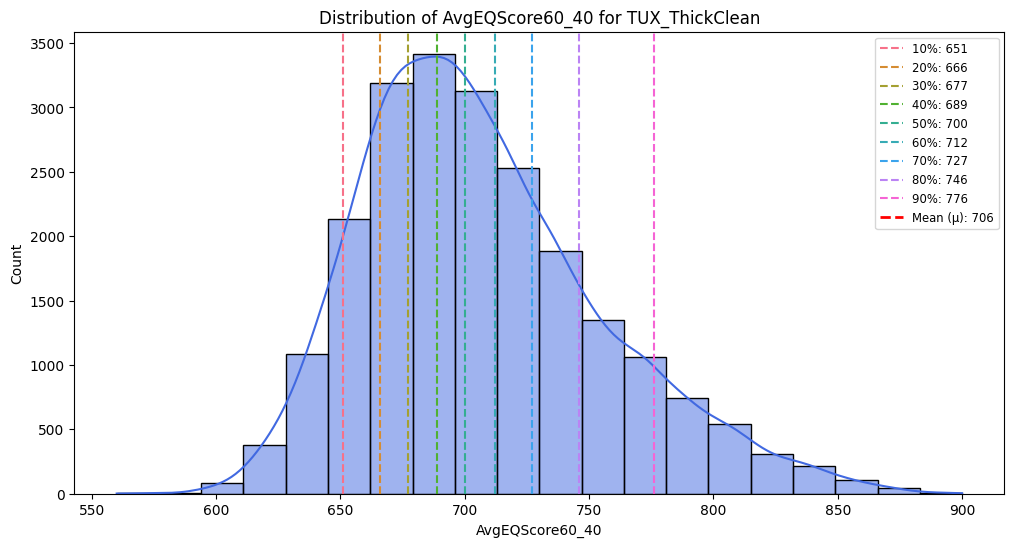

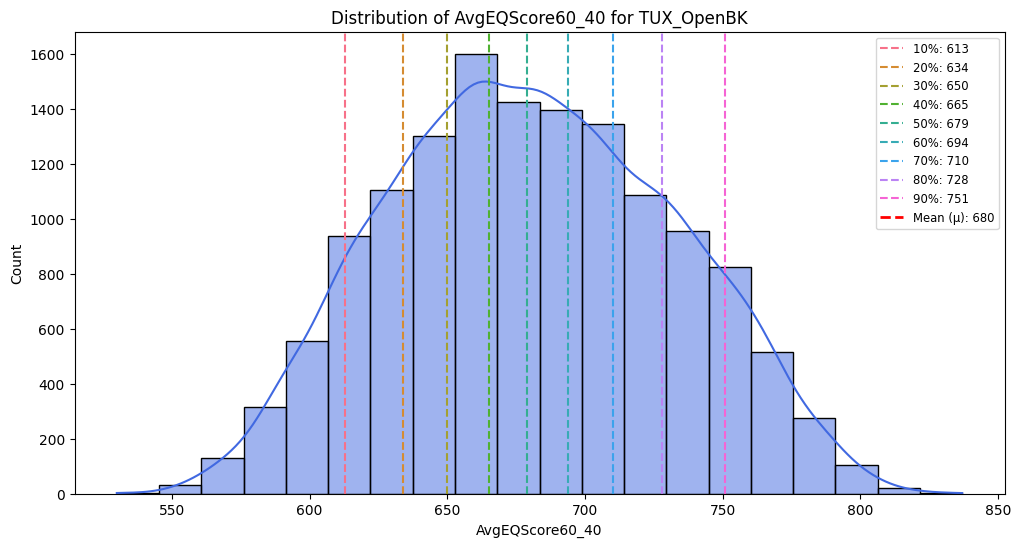

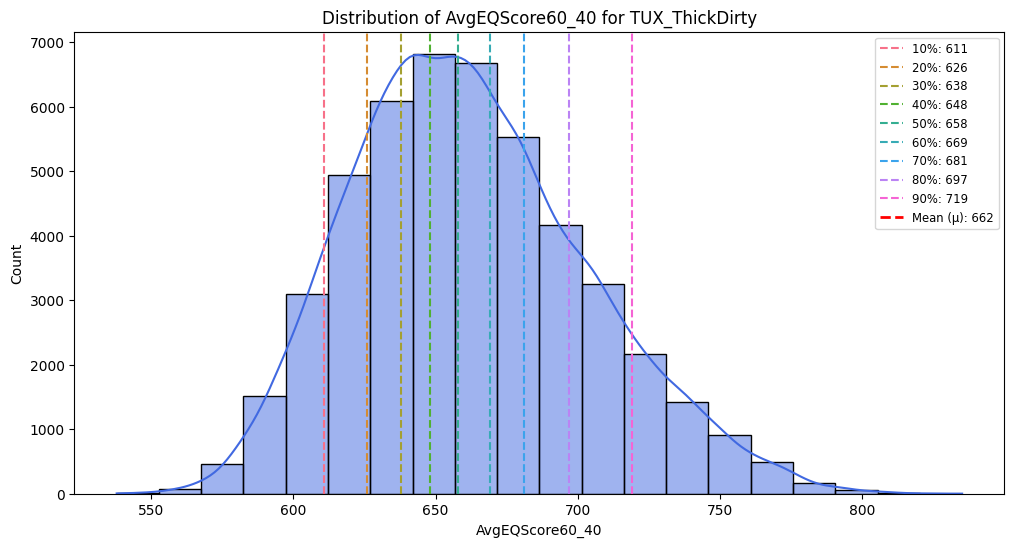

ValueError: cannot convert float NaN to integer

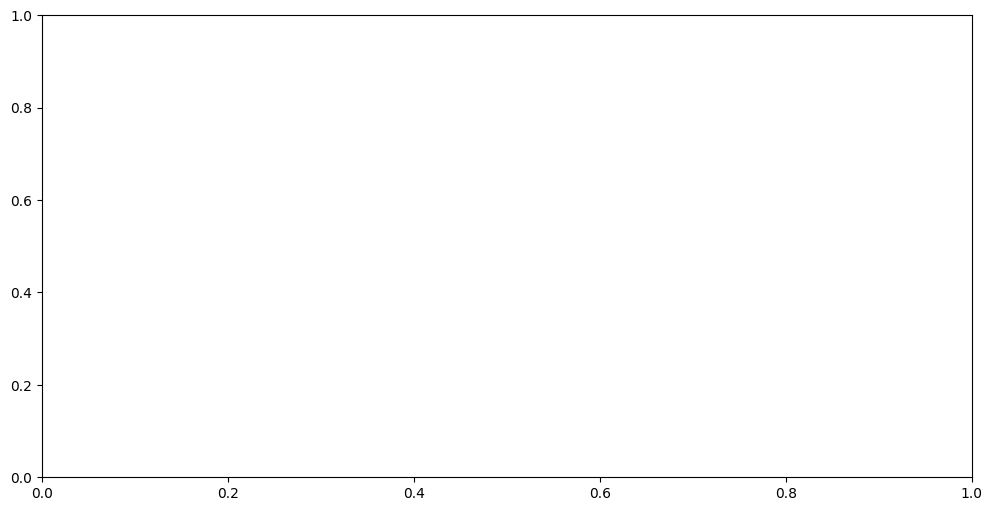

In [78]:
plot_segmented_distributions10(final_df, 'AvgEQScore60_40', 'ScorecardName', output_dir='quantile_histograms')


In [79]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118535 entries, 0 to 118534
Data columns (total 60 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   AccountId                     118535 non-null  int64         
 1   RequestDate                   118535 non-null  object        
 2   EffectiveDate                 118535 non-null  object        
 3   PfsModelName                  118535 non-null  object        
 4   CreditScorecardVersion        118534 non-null  object        
 5   CreditScorecardName           118534 non-null  object        
 6   CreditLogScore                118535 non-null  float64       
 7   CreditAdjustedLogScore        118535 non-null  float64       
 8   CreditProbablityToDefault     118535 non-null  float64       
 9   CreditEqualizedScore          118535 non-null  int64         
 10  CapacityScorecardVersion      118534 non-null  object        
 11  CapacityScore

In [80]:
final_df.to_excel(r'M:/Risk Management/DW/TUX Scorecard/TUX_Scores/Large_Payload_Output_wHardcuts_decile.xlsx', index=False)